In [4]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.1)






In [5]:
# Carregar dataset
# Se o arquivo for Excel:
# df = pd.read_excel("Online Retail.xlsx")
# Caso seja CSV:
df = pd.read_csv("online_retail.csv", encoding='latin1')

In [6]:
# Mostrar primeiras linhas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Exploração inicial

In [ ]:
print("Dimensão do dataset:", df.shape)
print("\nColunas disponíveis:", df.columns.tolist())
print("\nResumo dos dados:")
print(df.info())
print("\nValores nulos por coluna:")
print(df.isna().sum())


Dimensão do dataset: (541909, 8)

Colunas disponíveis: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Resumo dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Valores nulos por coluna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: i

Pré-processamento e limpeza

In [ ]:
# Converter coluna de data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



In [10]:
# Criar coluna de valor total
df['TotalValue'] = df['Quantity'] * df['UnitPrice']

In [11]:
# Remover cancelamentos e devoluções
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [12]:

# Padronizar descrições
df['Description'] = df['Description'].astype(str).str.strip()

In [13]:
# Remover duplicados
df = df.drop_duplicates()

print("Dataset após limpeza:", df.shape)

Dataset após limpeza: (524878, 9)


Estatísticas descritivas

In [14]:
print("Estatísticas descritivas:\n")
print(df[['Quantity','UnitPrice','TotalValue']].describe())

print("\nNúmero de clientes únicos:", df['CustomerID'].nunique())
print("Número de produtos únicos:", df['Description'].nunique())
print("Receita total:", df['TotalValue'].sum())
# Análise de vendas ao longo do tempo
df.set_index('InvoiceDate', inplace=True)

Estatísticas descritivas:

            Quantity      UnitPrice     TotalValue
count  524878.000000  524878.000000  524878.000000
mean       10.616600       3.922573      20.275399
std       156.280031      36.093028     271.693566
min         1.000000       0.001000       0.001000
25%         1.000000       1.250000       3.900000
50%         4.000000       2.080000       9.920000
75%        11.000000       4.130000      17.700000
max     80995.000000   13541.330000  168469.600000

Número de clientes únicos: 4338
Número de produtos únicos: 4015
Receita total: 10642110.804000001


Distribuições (histogramas)

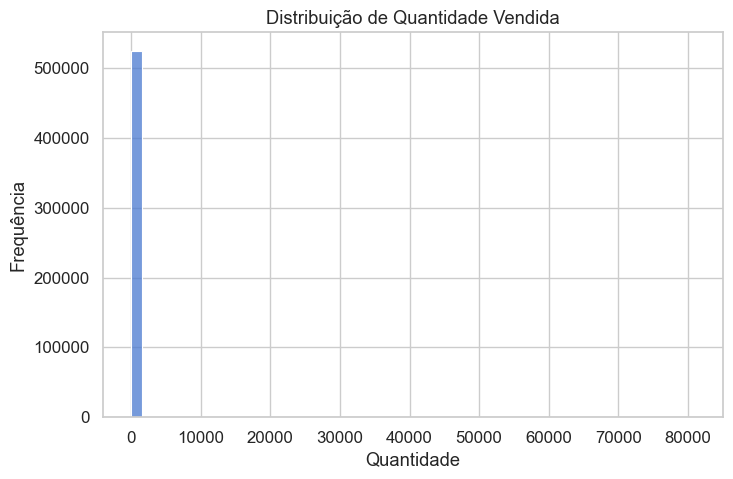

In [15]:
# Histograma da quantidade
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50, kde=False)
plt.title("Distribuição de Quantidade Vendida")
plt.xlabel("Quantidade")
plt.ylabel("Frequência")
plt.show()

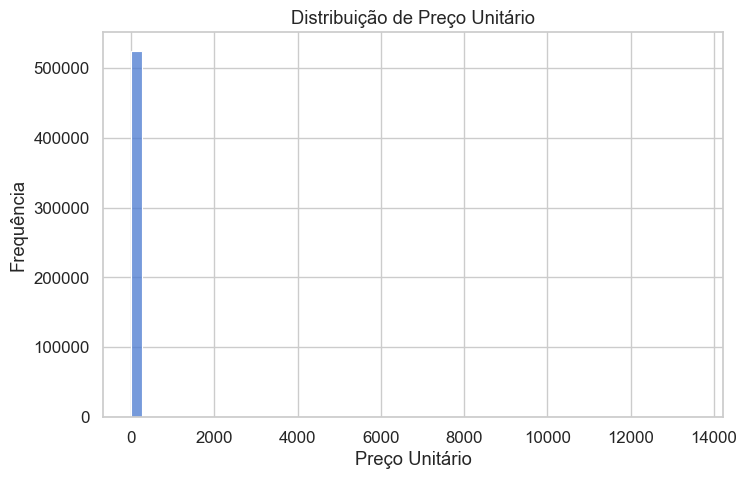

In [16]:
# Histograma do preço unitário
plt.figure(figsize=(8,5))
sns.histplot(df['UnitPrice'], bins=50, kde=False)
plt.title("Distribuição de Preço Unitário")
plt.xlabel("Preço Unitário")
plt.ylabel("Frequência")
plt.show()

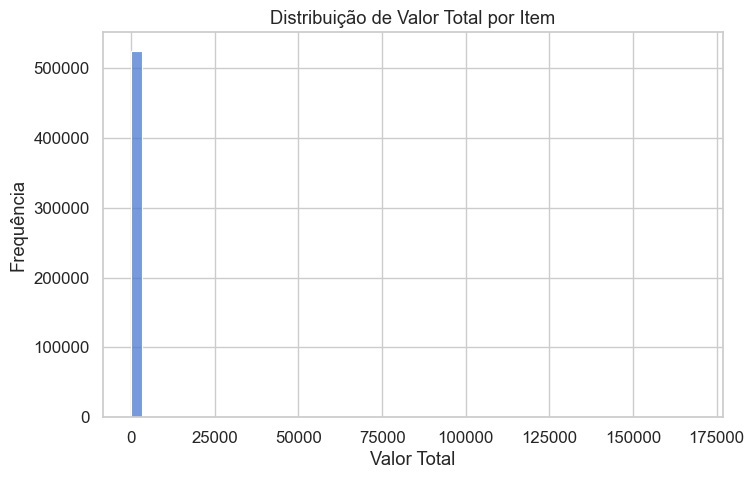

In [17]:
# Histograma do valor total
plt.figure(figsize=(8,5))
sns.histplot(df['TotalValue'], bins=50, kde=False)
plt.title("Distribuição de Valor Total por Item")
plt.xlabel("Valor Total")
plt.ylabel("Frequência")
plt.show()

Análises e visualizações
Receita por país

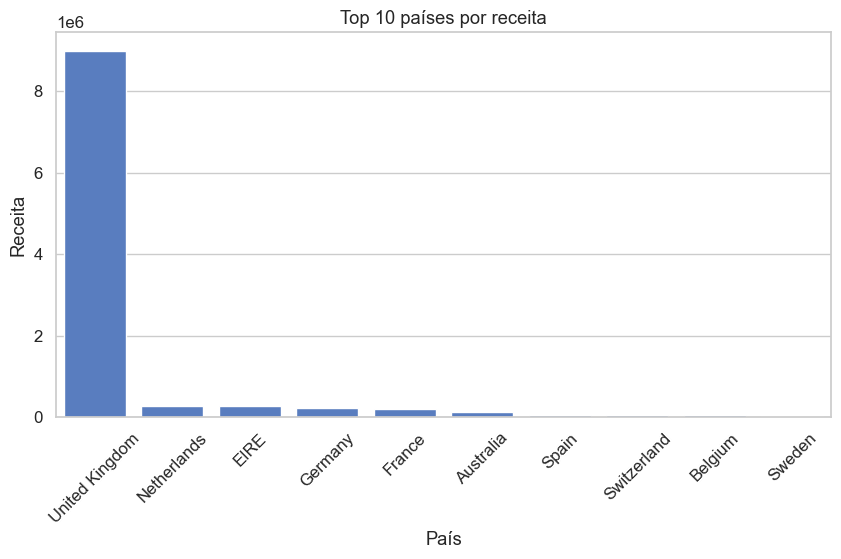

In [20]:
sales_by_country = df.groupby('Country')['TotalValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values)
plt.title("Top 10 países por receita")
plt.xlabel("País")
plt.ylabel("Receita")
plt.xticks(rotation=45)
plt.show()


Evolução mensal de vendas

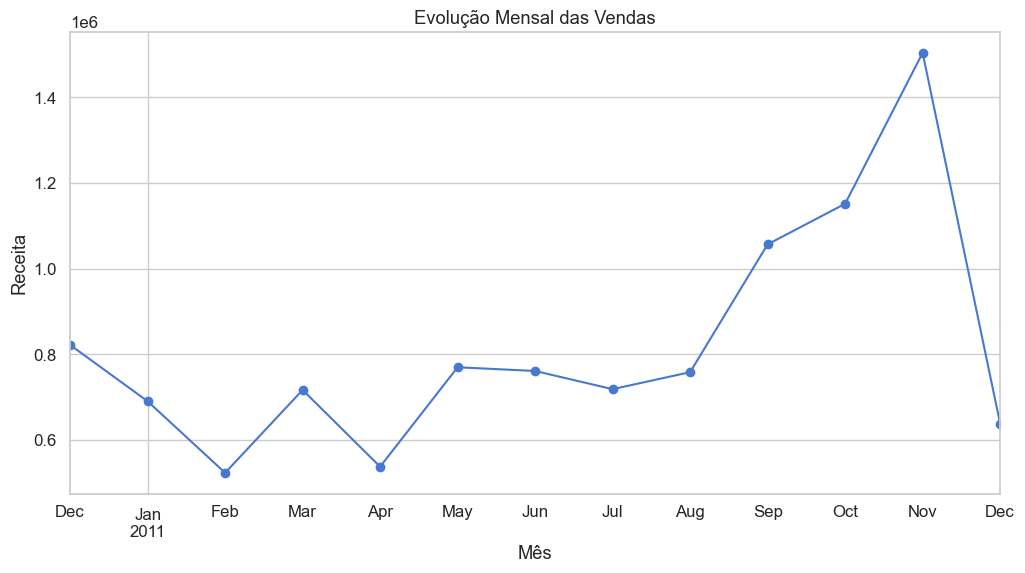

In [22]:
df['Month'] = df.index.to_period('M')
monthly_sales = df.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title("Evolução Mensal das Vendas")
plt.ylabel("Receita")
plt.xlabel("Mês")
plt.grid(True)
plt.show()


Produtos mais vendidos

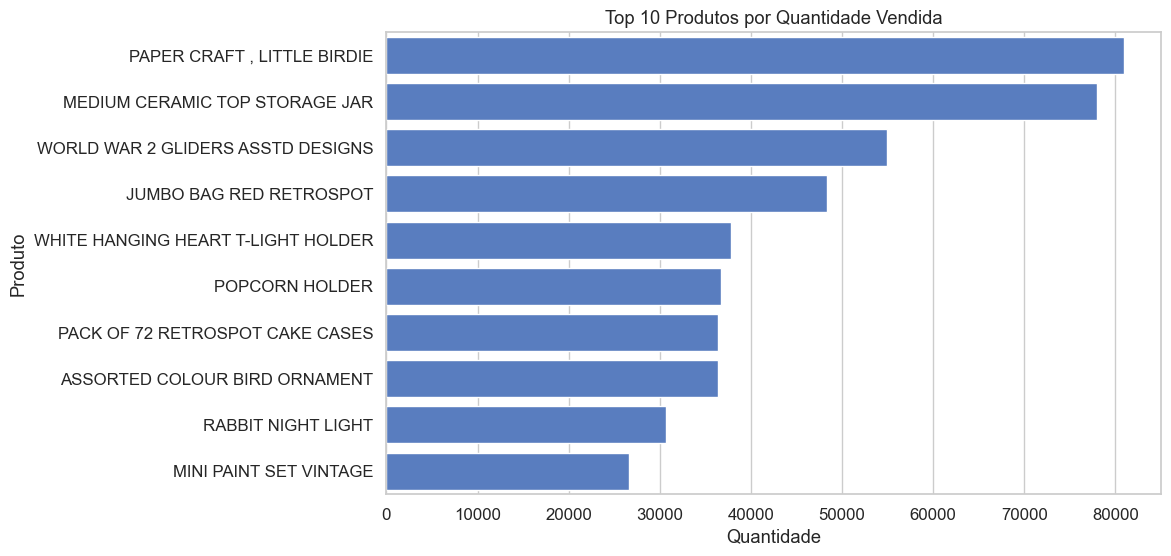

In [23]:
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products_qty.values, y=top_products_qty.index)
plt.title("Top 10 Produtos por Quantidade Vendida")
plt.xlabel("Quantidade")
plt.ylabel("Produto")
plt.show()


Boxplot (detecção de outliers)

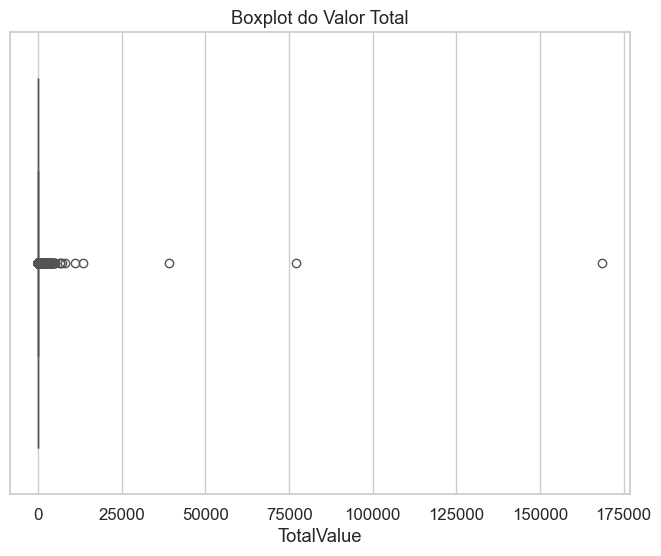

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['TotalValue'])
plt.title("Boxplot do Valor Total")
plt.show()


Dispersão (relação preço x quantidade)

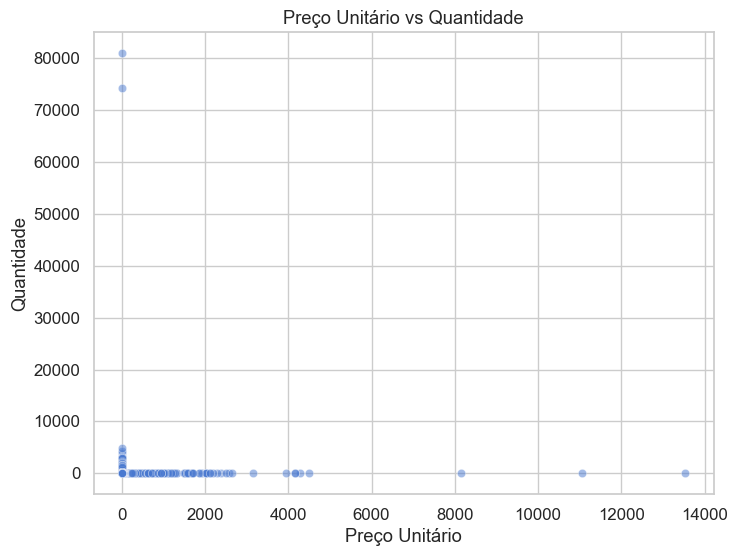

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df, alpha=0.5)
plt.title("Preço Unitário vs Quantidade")
plt.xlabel("Preço Unitário")
plt.ylabel("Quantidade")
plt.show()


Matriz de correlação

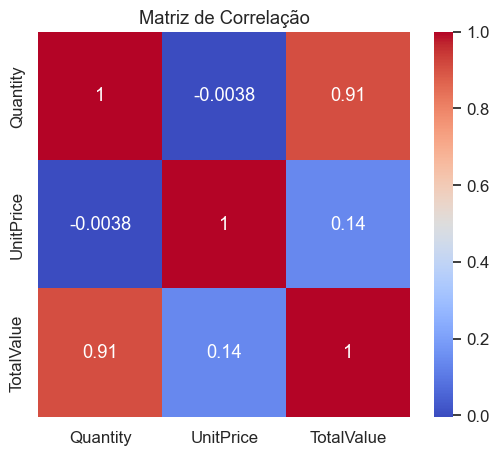

In [26]:
corr = df[['Quantity','UnitPrice','TotalValue']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()
